# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Web-Design-Challenge/Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#Your first objective is to build a series of scatter plots to showcase the following relationships:
#* Temperature (F) vs. Latitude
#* Humidity (%) vs. Latitude
#* Cloudiness (%) vs. Latitude
#* Wind Speed (mph) vs. Latitude
#
#After each plot add a sentence or too explaining what the code is and analyzing.
#City	Country	Date	Lat	Lng	Cloudiness	Humidity	Max Temp	Wind Speed

# List for holding lat_lngs and cities
n = 750
lat_lngs = []
cities = []
country_codes = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
#        cities.append(city)
#        Add the data to our lists
         cities.append(city)
         country_codes.append(city)
    
         country_codes = [x.upper() for x in country_codes]

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create base URL and indicate imperial units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [4]:
# Build partial query URL
query = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
# Create an "extracts" object to get the temperature, humidity, cloudiness and wind speed
dates = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
dates = []

for x in range(len(cities)):
    response = requests.get(f"{query}{cities[x]},{country_codes[x].upper()}").json()
    
    # Some of the cities we generate will not have data in openweathermap, so set their values to NaN
    try:
        temperature.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        dates.append(response['dt'])
    except KeyError:
        temperature.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        dates.append(np.nan)
    
    # When it is not cloudy and clouds does not exist, so set value to zero.
    try:
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        cloudiness.append(0)
    
    # Print each city name and query string    
    print(f"Processing record {x + 1} | {cities[x]}")
    print(f"{query}{cities[x]},{country_codes[x].upper()}")

print("--------------------------------------------")
print("Data Processing Complete")
print("--------------------------------------------")


# Assemble everything into a data frame
weather_df = pd.DataFrame({"City": cities,
                           "Country": country_codes,
                           "Date": dates,
                           "Latitude": latitude,
                           "Longitude": longitude,
                           "Humidity": humidity,
                           "Max Temp": temperature,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                          })


Processing record 1 | cloquet
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=cloquet,CLOQUET
Processing record 2 | albany
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=albany,ALBANY
Processing record 3 | cape town
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=cape town,CAPE TOWN
Processing record 4 | atuona
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=atuona,ATUONA
Processing record 5 | narsaq
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=narsaq,NARSAQ
Processing record 6 | vila velha
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=vila velha,VILA VELHA
Processing record 7 | cayenne
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d4467574

Processing record 55 | thompson
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=thompson,THOMPSON
Processing record 56 | half moon bay
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=half moon bay,HALF MOON BAY
Processing record 57 | ban nahin
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=ban nahin,BAN NAHIN
Processing record 58 | ilulissat
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=ilulissat,ILULISSAT
Processing record 59 | pochutla
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=pochutla,POCHUTLA
Processing record 60 | sabha
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=sabha,SABHA
Processing record 61 | ust-ilimsk
http://api.openweathermap.org/data/2

Processing record 108 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=longyearbyen,LONGYEARBYEN
Processing record 109 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=arraial do cabo,ARRAIAL DO CABO
Processing record 110 | victoria
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=victoria,VICTORIA
Processing record 111 | mae sai
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=mae sai,MAE SAI
Processing record 112 | esperance
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=esperance,ESPERANCE
Processing record 113 | annau
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=annau,ANNAU
Processing record 114 | skibbereen
http://api.openwe

Processing record 161 | ambilobe
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=ambilobe,AMBILOBE
Processing record 162 | januaria
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=januaria,JANUARIA
Processing record 163 | namibe
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=namibe,NAMIBE
Processing record 164 | hammerfest
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=hammerfest,HAMMERFEST
Processing record 165 | iskateley
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=iskateley,ISKATELEY
Processing record 166 | isoka
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=isoka,ISOKA
Processing record 167 | lolua
http://api.openweathermap.org/data/2.5/weather?appid

Processing record 215 | mugur-aksy
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=mugur-aksy,MUGUR-AKSY
Processing record 216 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=cabo san lucas,CABO SAN LUCAS
Processing record 217 | touros
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=touros,TOUROS
Processing record 218 | richards bay
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=richards bay,RICHARDS BAY
Processing record 219 | sao filipe
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=sao filipe,SAO FILIPE
Processing record 220 | praia da vitoria
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=praia da vitoria,PRAIA DA VITORIA
Processing recor

Processing record 269 | nanortalik
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=nanortalik,NANORTALIK
Processing record 270 | ocampo
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=ocampo,OCAMPO
Processing record 271 | hasaki
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=hasaki,HASAKI
Processing record 272 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=illoqqortoormiut,ILLOQQORTOORMIUT
Processing record 273 | domoni
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=domoni,DOMONI
Processing record 274 | owando
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=owando,OWANDO
Processing record 275 | alofi
http://api.openweathermap.org/data/2.5/w

Processing record 324 | key largo
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=key largo,KEY LARGO
Processing record 325 | talnakh
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=talnakh,TALNAKH
Processing record 326 | kununurra
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=kununurra,KUNUNURRA
Processing record 327 | pontianak
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=pontianak,PONTIANAK
Processing record 328 | banjar
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=banjar,BANJAR
Processing record 329 | monrovia
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=monrovia,MONROVIA
Processing record 330 | las vegas
http://api.openweathermap.org/data/2.5/wea

Processing record 379 | bargal
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=bargal,BARGAL
Processing record 380 | cidreira
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=cidreira,CIDREIRA
Processing record 381 | aldan
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=aldan,ALDAN
Processing record 382 | batagay
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=batagay,BATAGAY
Processing record 383 | la paz
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=la paz,LA PAZ
Processing record 384 | moerai
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=moerai,MOERAI
Processing record 385 | fort william
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757

Processing record 432 | vanimo
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=vanimo,VANIMO
Processing record 433 | north bend
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=north bend,NORTH BEND
Processing record 434 | meulaboh
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=meulaboh,MEULABOH
Processing record 435 | pillaro
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=pillaro,PILLARO
Processing record 436 | svetlyy
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=svetlyy,SVETLYY
Processing record 437 | tanout
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=tanout,TANOUT
Processing record 438 | matara
http://api.openweathermap.org/data/2.5/weather?appid=4293

Processing record 487 | broken hill
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=broken hill,BROKEN HILL
Processing record 488 | sretensk
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=sretensk,SRETENSK
Processing record 489 | pauini
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=pauini,PAUINI
Processing record 490 | aksu
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=aksu,AKSU
Processing record 491 | tazovskiy
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=tazovskiy,TAZOVSKIY
Processing record 492 | the valley
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=the valley,THE VALLEY
Processing record 493 | jaffna
http://api.openweathermap.org/data/2.5/weathe

Processing record 540 | huntington
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=huntington,HUNTINGTON
Processing record 541 | tilichiki
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=tilichiki,TILICHIKI
Processing record 542 | soresina
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=soresina,SORESINA
Processing record 543 | olafsvik
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=olafsvik,OLAFSVIK
Processing record 544 | foumban
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=foumban,FOUMBAN
Processing record 545 | llanelli
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=llanelli,LLANELLI
Processing record 546 | matamoros
http://api.openweathermap.org/data/2

Processing record 594 | karratha
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=karratha,KARRATHA
Processing record 595 | nabire
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=nabire,NABIRE
Processing record 596 | lincoln
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=lincoln,LINCOLN
Processing record 597 | itoman
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=itoman,ITOMAN
Processing record 598 | bogalusa
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=bogalusa,BOGALUSA
Processing record 599 | saravan
http://api.openweathermap.org/data/2.5/weather?appid=429304a77d446757476800e88a594b23&units=imperial&q=saravan,SARAVAN
Processing record 600 | astoria
http://api.openweathermap.org/data/2.5/weather?appid=429304a77

In [10]:
# The total sample size adn value count per field
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 9 columns):
City          617 non-null object
Country       617 non-null object
Date          578 non-null float64
Latitude      578 non-null float64
Longitude     578 non-null float64
Humidity      578 non-null float64
Max Temp      578 non-null float64
Cloudiness    617 non-null int64
Wind Speed    578 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 43.5+ KB


In [11]:
weather_df.head()

,City,Country,Date,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed
0,cloquet,CLOQUET,1.583031e+09,46.72,-92.46,79.0,30.20,1,3.36
1,albany,ALBANY,1.583031e+09,42.60,-73.97,57.0,21.20,20,9.17
2,cape town,CAPE TOWN,1.583031e+09,-33.93,18.42,82.0,64.99,0,2.24
3,atuona,ATUONA,1.583031e+09,-9.80,-139.03,77.0,81.84,16,17.45
4,narsaq,NARSAQ,1.583031e+09,60.92,-46.05,35.0,6.80,0,4.70


In [12]:
len(weather_df)

617

In [13]:
weather_df.head()

,City,Country,Date,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed
0,cloquet,CLOQUET,1.583031e+09,46.72,-92.46,79.0,30.20,1,3.36
1,albany,ALBANY,1.583031e+09,42.60,-73.97,57.0,21.20,20,9.17
2,cape town,CAPE TOWN,1.583031e+09,-33.93,18.42,82.0,64.99,0,2.24
3,atuona,ATUONA,1.583031e+09,-9.80,-139.03,77.0,81.84,16,17.45
4,narsaq,NARSAQ,1.583031e+09,60.92,-46.05,35.0,6.80,0,4.70


In [14]:
# Drop any records with NaN and reset index
weather_df.dropna(inplace=True)
weather_df.reset_index(drop=True)
weather_df.head()
#weather_df

,City,Country,Date,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed
0,cloquet,CLOQUET,1.583031e+09,46.72,-92.46,79.0,30.20,1,3.36
1,albany,ALBANY,1.583031e+09,42.60,-73.97,57.0,21.20,20,9.17
2,cape town,CAPE TOWN,1.583031e+09,-33.93,18.42,82.0,64.99,0,2.24
3,atuona,ATUONA,1.583031e+09,-9.80,-139.03,77.0,81.84,16,17.45
4,narsaq,NARSAQ,1.583031e+09,60.92,-46.05,35.0,6.80,0,4.70


In [15]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 0 to 616
Data columns (total 9 columns):
City          578 non-null object
Country       578 non-null object
Date          578 non-null float64
Latitude      578 non-null float64
Longitude     578 non-null float64
Humidity      578 non-null float64
Max Temp      578 non-null float64
Cloudiness    578 non-null int64
Wind Speed    578 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 45.2+ KB


In [16]:
print(f"The weather dataframe contains {len(weather_df['City'])} unique cities.")

The weather dataframe contains 578 unique cities.


In [17]:
weather_df.head()

,City,Country,Date,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed
0,cloquet,CLOQUET,1.583031e+09,46.72,-92.46,79.0,30.20,1,3.36
1,albany,ALBANY,1.583031e+09,42.60,-73.97,57.0,21.20,20,9.17
2,cape town,CAPE TOWN,1.583031e+09,-33.93,18.42,82.0,64.99,0,2.24
3,atuona,ATUONA,1.583031e+09,-9.80,-139.03,77.0,81.84,16,17.45
4,narsaq,NARSAQ,1.583031e+09,60.92,-46.05,35.0,6.80,0,4.70


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [49]:
# Save the DataFrame as a csv
# ../output_data/weather_data.csv
weather_df.to_csv("../Web-Design-Challenge/Resources/cities.csv", index=False, header=True)
weather_df.to_csv("../Web-Design-Challenge/cities.csv", index=False, header=True)

In [50]:
# Save the DataFrame as a HTML file 
weather_df.to_html("../Web-Design-Challenge/Resources/cities.html", index=False,header=True)
weather_df.to_html("../Web-Design-Challenge/cities.html", index=False,header=True)

In [51]:
weather_df.head()

,City,Country,Date,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed
0,cloquet,CLOQUET,1.583031e+09,46.72,-92.46,79.0,30.20,1,3.36
1,albany,ALBANY,1.583031e+09,42.60,-73.97,57.0,21.20,20,9.17
2,cape town,CAPE TOWN,1.583031e+09,-33.93,18.42,82.0,64.99,0,2.24
3,atuona,ATUONA,1.583031e+09,-9.80,-139.03,77.0,81.84,16,17.45
4,narsaq,NARSAQ,1.583031e+09,60.92,-46.05,35.0,6.80,0,4.70


In [52]:
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

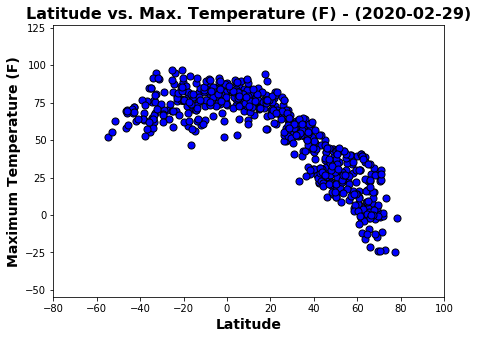

In [53]:
# Latitude vs. Temperature Plot
# Define figure size
plt.figure(figsize=(7,5))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Max Temp'],
            linewidths = 1.0, edgecolors = 'black', color = 'blue',marker ="o", s=50)

# Add labeling
plt.title(f"Latitude vs. Max. Temperature (F) - ({weather_dt})",fontsize=16, weight='bold')
plt.xlabel("Latitude",fontsize=14, weight='bold')
plt.ylabel("Maximum Temperature (F)",fontsize=14, weight='bold')

# Modify ticks
plt.xlim(-80,100)
plt.ylim(min(weather_df['Max Temp']) - 30, max(weather_df['Max Temp']) + 30)
plt.savefig(f"../Web-Design-Challenge/Resources/Max_Temp.png")
plt.savefig(f"../Web-Design-Challenge/Images/Max_Temp.png")
plt.savefig(f"../Web-Design-Challenge/Max_Temp.png")
plt.show()

In [54]:
# Humidity vs Latitude
# Shows that temperatures are higher near the equator and in the southern hemisphere.
# More temperatures werepulled in cities north of the equator.
# Those far north of the equator are below zero degrees as there appear to be more cities 
#     far north than far south provided by the weather api.

#### Latitude vs. Humidity Plot

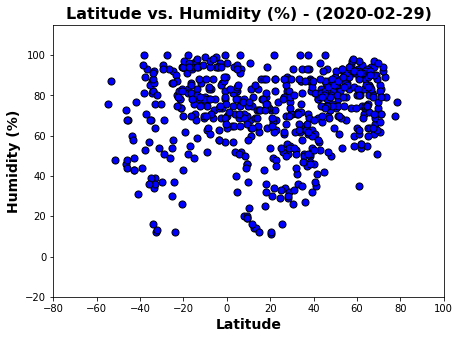

In [55]:
# Define figure size
plt.figure(figsize=(7,5))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Humidity'],
            linewidths = 1.0, edgecolors = 'black', color = 'blue',marker ="o", s=50)

# Add labeling
plt.title(f"Latitude vs. Humidity (%) - ({weather_dt})",fontsize=16, weight='bold')
plt.xlabel("Latitude",fontsize=14, weight='bold')
plt.ylabel("Humidity (%)",fontsize=14, weight='bold')

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-20, 115)
plt.savefig(f"../Web-Design-Challenge/Resources/Humidity.png")
plt.savefig(f"../Web-Design-Challenge/Images/Humidity.png")
plt.savefig(f"../Web-Design-Challenge/Humidity.png")
plt.show()

In [56]:
# Humidity vs Latitude
# It appears that there is more humidity in warmer climates with this being the 
#    same for both north and south of the equator.  

#### Latitude vs. Cloudiness Plot

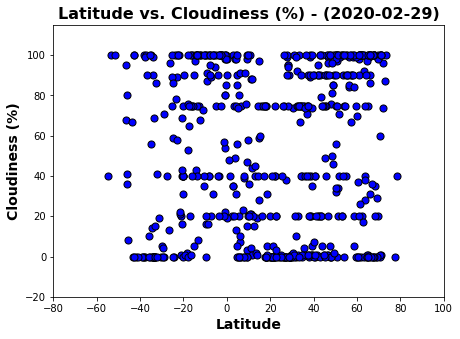

In [57]:
# Define figure size
plt.figure(figsize=(7,5))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Cloudiness'],
            linewidths = 1.0, edgecolors = 'black', color = 'blue',marker ="o", s=50)

# Add labeling
plt.title(f"Latitude vs. Cloudiness (%) - ({weather_dt})",fontsize=16, weight='bold')
plt.xlabel("Latitude",fontsize=14, weight='bold')
plt.ylabel("Cloudiness (%)",fontsize=14, weight='bold')

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-20, 115)
plt.savefig(f"../Web-Design-Challenge/Resources/Cloudiness.png")
plt.savefig(f"../Web-Design-Challenge/Images/Cloudiness.png")
plt.savefig(f"../Web-Design-Challenge/Cloudiness.png")
plt.show()

In [58]:
# Cloudiness vs Latitude
# It appears that it is more cloudy when warmer and north of the equator vs south of the equator.

#### Latitude vs. Wind Speed Plot

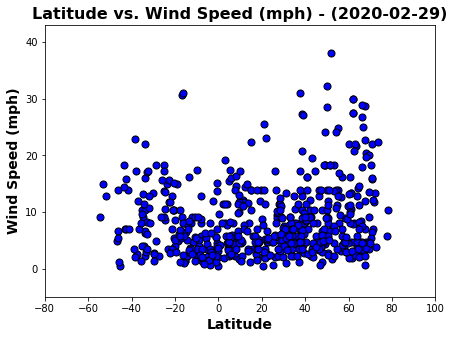

In [59]:
# Define figure size
plt.figure(figsize=(7,5))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Wind Speed'],
            linewidths = 1.0, edgecolors = 'black', color = 'blue',marker ="o", s=50)

# Scatter plot labeling
plt.title(f"Latitude vs. Wind Speed (mph) - ({weather_dt})",fontsize=16, weight='bold')
plt.xlabel("Latitude",fontsize=14, weight='bold')
plt.ylabel("Wind Speed (mph)",fontsize=14, weight='bold')

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-5, max(weather_df['Wind Speed'])+5)
plt.savefig(f"../Web-Design-Challenge/Resources/Wind_Speed.png")
plt.savefig(f"../Web-Design-Challenge/Images/Wind_Speed.png")
plt.savefig(f"../Web-Design-Challenge/Wind_Speed.png")
plt.show()

In [60]:
# Wind Speed vs Latitude 
# It appears wind speed generally stays in the 0 to 15 mph range with the northern hemisphere experiencing 
#    days with higher gust up to 40 mph on this particular day. 

## Linear Regression

In [61]:
# Create Northern and Southern Hemisphere DataFrames
# Your next objective is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):
# * Northern Hemisphere - Temperature (F) vs. Latitude
# * Southern Hemisphere - Temperature (F) vs. Latitude
# * Northern Hemisphere - Humidity (%) vs. Latitude
# * Southern Hemisphere - Humidity (%) vs. Latitude
# * Northern Hemisphere - Cloudiness (%) vs. Latitude
# * Southern Hemisphere - Cloudiness (%) vs. Latitude
# * Northern Hemisphere - Wind Speed (mph) vs. Latitude
# * Southern Hemisphere - Wind Speed (mph) vs. Latitude

# 0-City, 1-Country, 2-Date, 3-Latitude, 4-Longitude, 5-Humidity, 6-Max Temp, 7-Cloudiness, 8-Wind Speed

In [62]:
#Split original weather_df into a northern df where Latitude is greater than or equal to Zero
weather_nlat_df = weather_df[weather_df['Latitude'] >= 0]
weather_nlat_df.head()

,City,Country,Date,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed
0,cloquet,CLOQUET,1.583031e+09,46.72,-92.46,79.0,30.2,1,3.36
1,albany,ALBANY,1.583031e+09,42.60,-73.97,57.0,21.2,20,9.17
4,narsaq,NARSAQ,1.583031e+09,60.92,-46.05,35.0,6.8,0,4.70
6,cayenne,CAYENNE,1.583031e+09,4.93,-52.33,78.0,78.8,90,4.70
7,hamilton,HAMILTON,1.583031e+09,39.18,-84.53,63.0,30.2,1,4.12


In [63]:
#Split original weather_df into a southern df where Latitude is less than Zero
weather_slat_df = weather_df[weather_df['Latitude'] < 0]
weather_slat_df.head()

,City,Country,Date,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed
2,cape town,CAPE TOWN,1.583031e+09,-33.93,18.42,82.0,64.99,0,2.24
3,atuona,ATUONA,1.583031e+09,-9.80,-139.03,77.0,81.84,16,17.45
5,vila velha,VILA VELHA,1.583031e+09,-20.33,-40.29,94.0,77.00,75,3.36
9,rikitea,RIKITEA,1.583031e+09,-23.12,-134.97,80.0,79.66,100,15.30
11,ushuaia,USHUAIA,1.583031e+09,-54.80,-68.30,76.0,51.80,40,9.17


In [64]:
# OPTIONAL: Create a function to create Linear Regression plots to be utilized for the remainder of the plots by Hemisphere

def plotLinRegress(xlat,ydata,xlabel,ylabel,labelposition):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xlat, ydata)
    print(f"The r-squared is: {rvalue}")
    lin_regress_values = xlat * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xlat,ydata)
    plt.plot(xlat,lin_regress_values,"r-")
    plt.annotate(line_eq,labelposition,fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9070561232314525


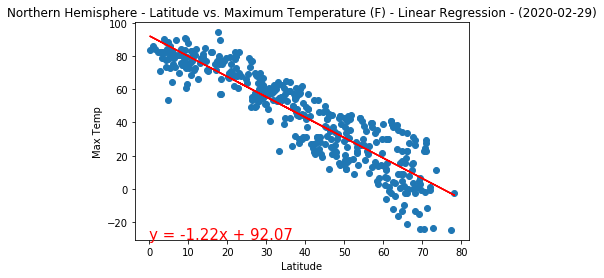

<Figure size 432x288 with 0 Axes>

In [65]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.title(f"Northern Hemisphere - Latitude vs. Maximum Temperature (F) - Linear Regression - ({weather_dt})")
xlabel = "Latitude"
ylabel = "Max Temp"
labelposition = (0,-30)
plotLinRegress(weather_nlat_df[xlabel],weather_nlat_df[ylabel],xlabel,ylabel,labelposition)
plt.savefig(f"../Web-Design-Challenge/Resources/Max Temp - Linear Regression - Northern Hemisphere.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3795644886361302


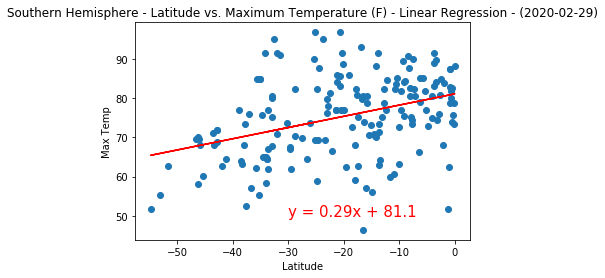

<Figure size 432x288 with 0 Axes>

In [66]:
#Southern Hemisphere - Latitude vs. Maximum Temperature (F) - Linear Regression
plt.title(f"Southern Hemisphere - Latitude vs. Maximum Temperature (F) - Linear Regression - ({weather_dt})")
xlabel = "Latitude"
ylabel = "Max Temp"
labelposition = (-30,50)
plotLinRegress(weather_slat_df[xlabel],weather_slat_df[ylabel],xlabel,ylabel,labelposition)
plt.savefig(f"../Web-Design-Challenge/Resources/Max Temp - Linear Regression - Southern Hemisphere.png")

In [67]:
# Max Temp vs. Latitude Linear Regression
# This shows that both northern and southern hemispheres experience higher temperatures
#      if the city is closer to the equator
# Therefore, the closer you are to the equator the higher probably you will experience 
#      warmer days vs cities that are further from the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.32701644192887086


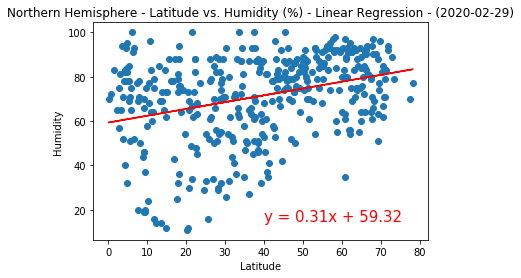

<Figure size 432x288 with 0 Axes>

In [68]:
#Northern Hemisphere - Latitude vs. Humidity (%) - Linear Regression
plt.title(f"Northern Hemisphere - Latitude vs. Humidity (%) - Linear Regression - ({weather_dt})")
xlabel = "Latitude"
ylabel = "Humidity"
labelposition = (40,15)
plotLinRegress(weather_nlat_df[xlabel],weather_nlat_df[ylabel],xlabel,ylabel,labelposition)
plt.savefig(f"../Web-Design-Challenge/Resources/Humidity - Linear Regression - Northern Hemisphere.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.33193579432236875


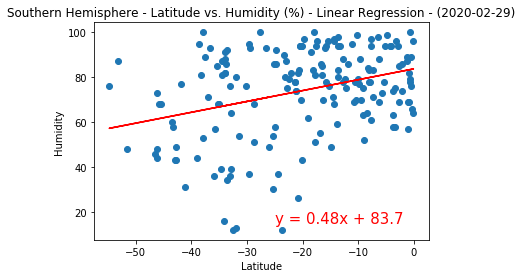

<Figure size 432x288 with 0 Axes>

In [69]:
#Southern Hemisphere - Latitude vs. Humidity (%) - Linear Regression
plt.title(f"Southern Hemisphere - Latitude vs. Humidity (%) - Linear Regression - ({weather_dt})")
xlabel = "Latitude"
ylabel = "Humidity"
labelposition = (-25,15)
plotLinRegress(weather_slat_df[xlabel],weather_slat_df[ylabel],xlabel,ylabel,labelposition)
plt.savefig(f"../Web-Design-Challenge/Resources/Humidity - Linear Regression - Southern Hemisphere.png")

In [70]:
# Humidity (%) vs. Latitude Linear Regression
#  It appears in both hemispheres that the warmer it is the more Humidity you experience.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.24294916620820906


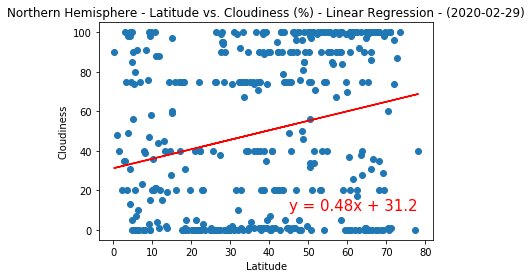

<Figure size 432x288 with 0 Axes>

In [71]:
#Northern Hemisphere - Latitude vs. Cloudiness (%) - Linear Regression
plt.title(f"Northern Hemisphere - Latitude vs. Cloudiness (%) - Linear Regression - ({weather_dt})")
xlabel = "Latitude"
ylabel = "Cloudiness"
labelposition = (45,10)
plotLinRegress(weather_nlat_df[xlabel],weather_nlat_df[ylabel],xlabel,ylabel,labelposition)
plt.savefig(f"../Web-Design-Challenge/Resources/Cloudiness - Linear Regression - Northern Hemisphere.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3266061250885212


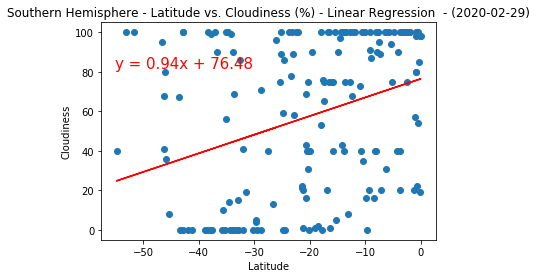

<Figure size 432x288 with 0 Axes>

In [72]:
#Southern Hemisphere - Latitude vs. Cloudiness (%) - Linear Regression
plt.title(f"Southern Hemisphere - Latitude vs. Cloudiness (%) - Linear Regression  - ({weather_dt})")
xlabel = "Latitude"
ylabel = "Cloudiness"
labelposition = (-55,82)
plotLinRegress(weather_slat_df[xlabel],weather_slat_df[ylabel],xlabel,ylabel,labelposition)
plt.savefig(f"../Web-Design-Challenge/Resources/Cloudiness - Linear Regression - Southern Hemisphere.png")

In [73]:
# Cloudiness (%) vs. Latitude Linear Regression
#  It appears the northern hemisphere experiences more cloudy days than the southern hemisphere.
#  It appears that both hemispheres experience more cloudy days hen it is warmer.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.20534780041710132


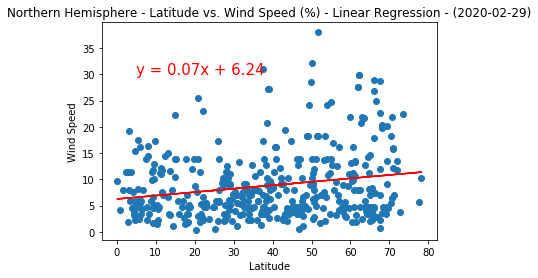

<Figure size 432x288 with 0 Axes>

In [74]:
#Northern Hemisphere - Latitude vs. Wind Speed (%) - Linear Regression
plt.title(f"Northern Hemisphere - Latitude vs. Wind Speed (%) - Linear Regression - ({weather_dt})")
xlabel = "Latitude"
ylabel = "Wind Speed"
labelposition = (5,30)
plotLinRegress(weather_nlat_df[xlabel],weather_nlat_df[ylabel],xlabel,ylabel,labelposition)
plt.savefig(f"../Web-Design-Challenge/Resources/Wind Speed - Linear Regression - Northern Hemisphere.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.31964286780050044


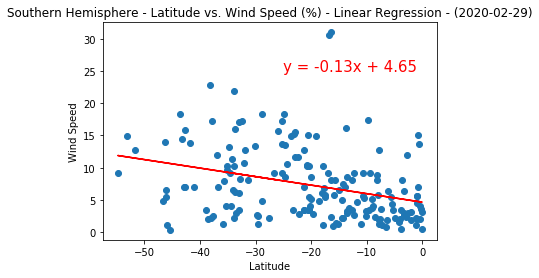

<Figure size 432x288 with 0 Axes>

In [75]:
#Southern Hemisphere - Latitude vs. Wind Speed (%) - Linear Regression
plt.title(f"Southern Hemisphere - Latitude vs. Wind Speed (%) - Linear Regression - ({weather_dt})")
xlabel = "Latitude"
ylabel = "Wind Speed"
labelposition = (-25,25)
plotLinRegress(weather_slat_df[xlabel],weather_slat_df[ylabel],xlabel,ylabel,labelposition)
plt.savefig(f"../Web-Design-Challenge/Resources/Wind Speed - Linear Regression - Southern Hemisphere.png")

In [76]:
# Wind Speed (mph) vs. Latitude Linear Regression
#  It appears that for both hemispheres the further from the equator you get the experienced stronger 
#     winds than those in a city near the equator.

In [77]:
weather_df.head()

,City,Country,Date,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed
0,cloquet,CLOQUET,1.583031e+09,46.72,-92.46,79.0,30.20,1,3.36
1,albany,ALBANY,1.583031e+09,42.60,-73.97,57.0,21.20,20,9.17
2,cape town,CAPE TOWN,1.583031e+09,-33.93,18.42,82.0,64.99,0,2.24
3,atuona,ATUONA,1.583031e+09,-9.80,-139.03,77.0,81.84,16,17.45
4,narsaq,NARSAQ,1.583031e+09,60.92,-46.05,35.0,6.80,0,4.70


## THE END